In [3]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [4]:
mpl.rcParams['figure.figsize'] = (12, 8)

### Вектор $\theta$
Сгенерируйте вектор $\theta$, состоящий из точек n_points, равномерно распределенных в интервале от 0 до $2\pi$

In [5]:
n_points = 10**5
theta = np.random.uniform(0,2*np.pi,n_points)

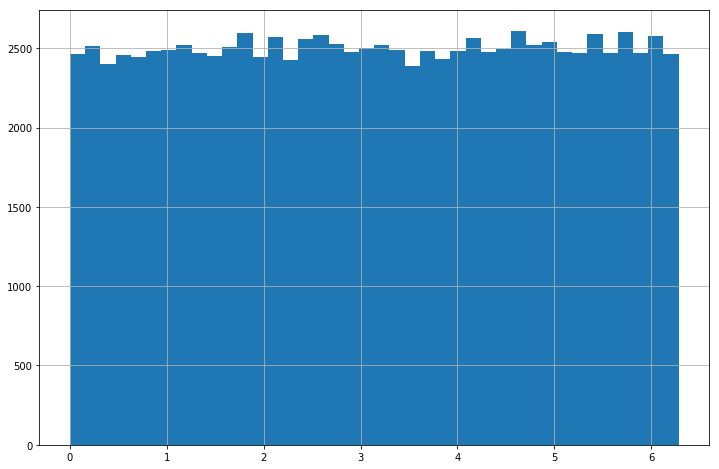

In [6]:
plt.hist(theta, bins=40);
plt.grid()

### Вектора ошибок $\epsilon_x$ и $\epsilon_y$

Сгенерируйте вектора ошибок $\epsilon_x$ и $\epsilon_y$, состоящие из точек n_points, распределенных нормально с параметрами $N(0, \epsilon^2)$

In [7]:
epsilon = 0.1
epsilon_x = np.random.normal(0,epsilon**2,n_points)
epsilon_y = np.random.normal(0,epsilon**2,n_points)

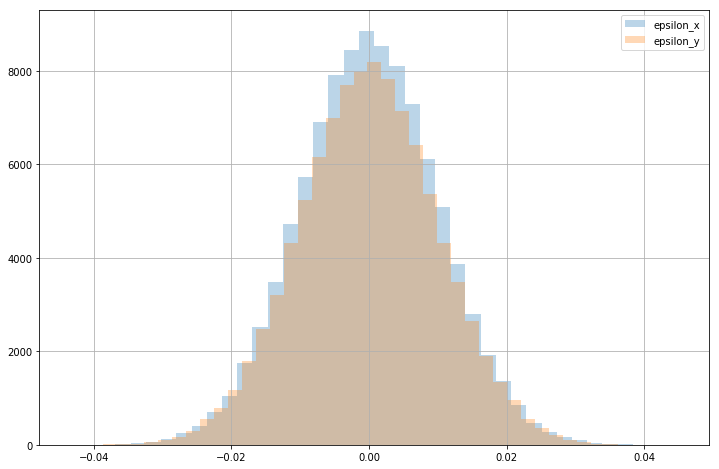

In [8]:
plt.hist(epsilon_x, bins=40, alpha=0.3, label='epsilon_x');
plt.hist(epsilon_y, bins=40, alpha=0.3, label='epsilon_y');
plt.grid()
plt.legend()

### Вектора $X$ и $Y$

Вычислите итоговые вектора $X$ и $Y$:

$$ X = \cos(\theta) + \epsilon_x $$
$$ Y = \sin(\theta) + \epsilon_y $$

In [9]:
X = np.cos(theta) + epsilon_x
Y = np.sin(theta) + epsilon_y

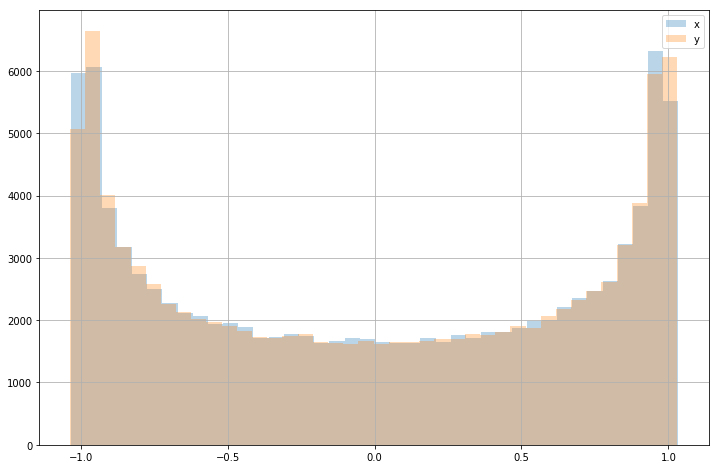

In [10]:
plt.hist(X, bins=40, alpha=0.3, label='x');
plt.hist(Y, bins=40, alpha=0.3, label='y');
plt.grid()
plt.legend()

## Коэффициент корреляции
Вычислите коэффициент корреляции между $x$ и $y$.

In [26]:
corr_coef =  np.corrcoef(X,Y)[0,1]
print(u'Коэффициент корреляции между x и y равен {}'.format(corr_coef))

Коэффициент корреляции между x и y равен -0.00438356515445246


## Проверка, что зависимость между $x$ и $y$ есть
Вы навернео заметили, что коэффициент корреляции между $x$ и $y$ близок к нулю.

Но тем не менее, зависимость между ними все же есть. Проверьте, что она есть, вычислив корреляцию между $x^2$ и $1 - y^2$

In [27]:
corr_coef = np.corrcoef(X**2,1 - Y**2)[0,1]
print(u'Коэффициент корреляции между X^2 и (1 - Y^2) равен {}'.format(corr_coef))

Коэффициент корреляции между X^2 и (1 - Y^2) равен 0.05758850630730902


## Взаимная информация

Зная, как зависят между собой $X$ и $Y$ мы в предыдущем пункте смогли подобрать преобразовать их так, чтобы коэффициент корреляции стал бы отличен от нуля.
Предположим, что мы не знаем, какая зависимость между $X$ и $Y$. И при помощи взаимной информации попытаемся понять, есть ли хоть какая-то зависимость между $X$ и $Y$.


## Квантильное преобразрование
Сначала преобразуем $X$ и $Y$ в квантили от 0 до 99, чтобы с ними было удобнее работать.

### Примечание
Функция quantile_transform из sklearn.preprocessing вернет квантили от 0. до 1.0. Преобразуйте их в диапазон от 0 до 99, умножив на 100 и преобразовав итоговый вектор к типу int (сработает метод numpy-массива astype(np.int))

In [28]:
from sklearn.preprocessing import quantile_transform
n_quantiles = 100

In [29]:
X_quantile = (100.0 * quantile_transform(X.reshape(-1, 1), n_quantiles=n_quantiles)).astype(np.int)
Y_quantile = (100.0 * quantile_transform(Y.reshape(-1, 1), n_quantiles=n_quantiles)).astype(np.int)

## Убедимся, что величины X_quantile и Y_quantile действительно принимают значения от  0 до 99 и равномерно распределены на этом интервале

In [30]:
X_unique_values, X_counts = np.unique(X_quantile, return_counts=True)
Y_unique_values, Y_counts = np.unique(Y_quantile, return_counts=True)

In [31]:
print('X_unique_values', X_unique_values)
print('Y_unique_values', Y_unique_values)

X_unique_values [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Y_unique_values [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [32]:
assert(len(set(X_unique_values).difference(set(range(n_quantiles)))) == 0)
assert(len(set(Y_unique_values).difference(set(range(n_quantiles)))) == 0)
print(u'Гуд! Квантильное кодирование похоже на правду!')

Гуд! Квантильное кодирование похоже на правду!


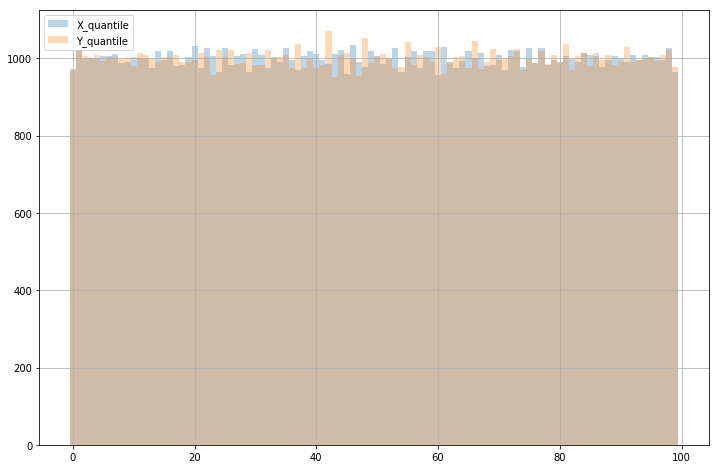

In [33]:
plt.bar(X_unique_values, X_counts, width=1, alpha=0.3, label='X_quantile');
plt.bar(Y_unique_values, Y_counts, width=1, alpha=0.3, label='Y_quantile');
plt.grid()
plt.legend()

## Вычислим эмпирическое совместное распределение $P(X, Y)$
Для каждого $i$ и $j$ из диапазона от 0 до 99, совместная вероятность того, что $x == i$ и $y == j$ равна:
$$P(x=i, y=j) = \dfrac{1}{N} \cdot \sum_{k=0}^{N} I(x_k = i, y_k = j)$$

где

$N$ -- полный размер выборки (т.е. n_points), 
$I(x_k = i, y_k = j)$ -- индикатор того, что значение $x_k$ равно $i$, при этом значение $y_k$ равно $j$.

In [34]:
P_XY = np.zeros((n_quantiles, n_quantiles))

for x_index, y_index in zip(X_quantile, Y_quantile):
    P_XY[x_index, y_index] += 1/n_points

## Вычислим маргинальные распределения $P(X)$, $P(Y)$ и распределение двух независимых величин $P_\textrm{independed}(X, Y)$
$$P(x) = \sum_{y = 0}^{99} P(x, y)$$
$$P(y) = \sum_{x = 0}^{99} P(x, y)$$
$$P_\textrm{independed}(x, y) = P(x) * P(y)$$

In [35]:
P_X = P_XY.sum(axis=1)
P_Y = P_XY.sum(axis=0)
P_XY_independed = P_X.reshape((-1, 1)).dot(P_Y.reshape((1, -1)))

Так будет выглядеть совместное рапределение для двух независимых величин


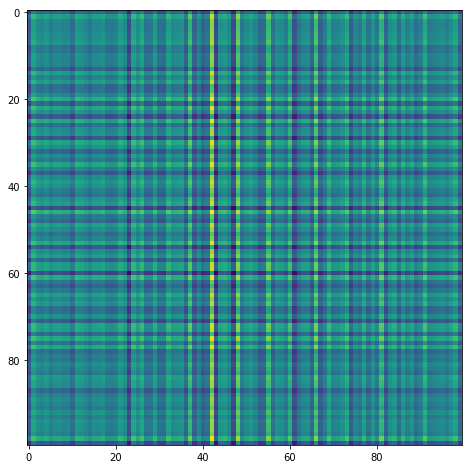

In [36]:
print(u'Так будет выглядеть совместное рапределение для двух независимых величин')
plt.imshow(P_XY_independed)

А так выглядит совместное рапределение для исследуемых нами величин X и Y


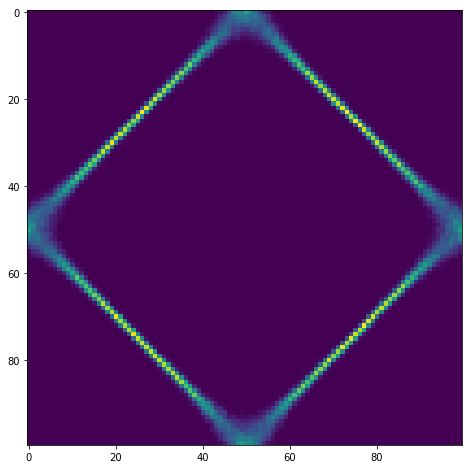

In [37]:
print(u'А так выглядит совместное рапределение для исследуемых нами величин X и Y')
plt.imshow(P_XY)

## Вычислим взаимную информацию
Соберите все воедино -- напишите функцию, которая по распределению $P(x, y)$ вычисляет взаимную информацию MI(X, Y) по следующим формулам:
$$P(x) = \sum_{y = 0}^{99} P(x, y)$$
$$P(y) = \sum_{x = 0}^{99} P(x, y)$$

$$ MI(X, Y) = \sum_{x = 0}^{99} \sum_{y = 0}^{99} P(x, y) \cdot \log\left[\dfrac{P(x, y)}{P(x) \cdot P(y)}\right]$$

### Примечание
Для многих значений x, y значение вероятности P(x, y) равно нулю. В этом случае все слагаемое $P(x, y) \cdot \log\left[\dfrac{P(x, y)}{P(x) \cdot P(y)}\right]$ также равно нулю.

In [38]:
def get_mutual_information(P_XY):
    P_X = P_XY.sum(axis=1)
    P_Y = P_XY.sum(axis=0)
    mutual_information = 0.0
    for x_index in range(P_XY.shape[0]):
        for y_index in range(P_XY.shape[1]):
            if (P_XY[x_index,y_index]!=0):
                mutual_information += P_XY[x_index,y_index]*np.log(P_XY[x_index,y_index]/(P_X[x_index]*P_Y[y_index]))
    return mutual_information

## Проверьте себя
Взаимная информация для независимого распределения должна быть близка к нулю

In [39]:
get_mutual_information(P_XY_independed)

-3.726960262040463e-15

## Взаимная информация распределения $P(x, y)$ равна:

In [40]:
get_mutual_information(P_XY)

2.4045144065371153